# Story 1
Andrew Bowen    
DATA 608: Knowledge and Visual Analytics    
CUNY Data Science Master's    

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import json

In [57]:
# First, let's read our data into a pandas dataframe
df = pd.read_excel("./data/IIJA-FUNDING-AS-OF-MARCH-2023.xlsx")
df.head()

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000


In [58]:
# Clean up our dataframe names and types
df.columns = ['state', 'total_funding']
df['total_funding'] = df['total_funding'].astype(float)

df.head()

,state,total_funding
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000


Text(0.5, 0, 'State/Terrotory')

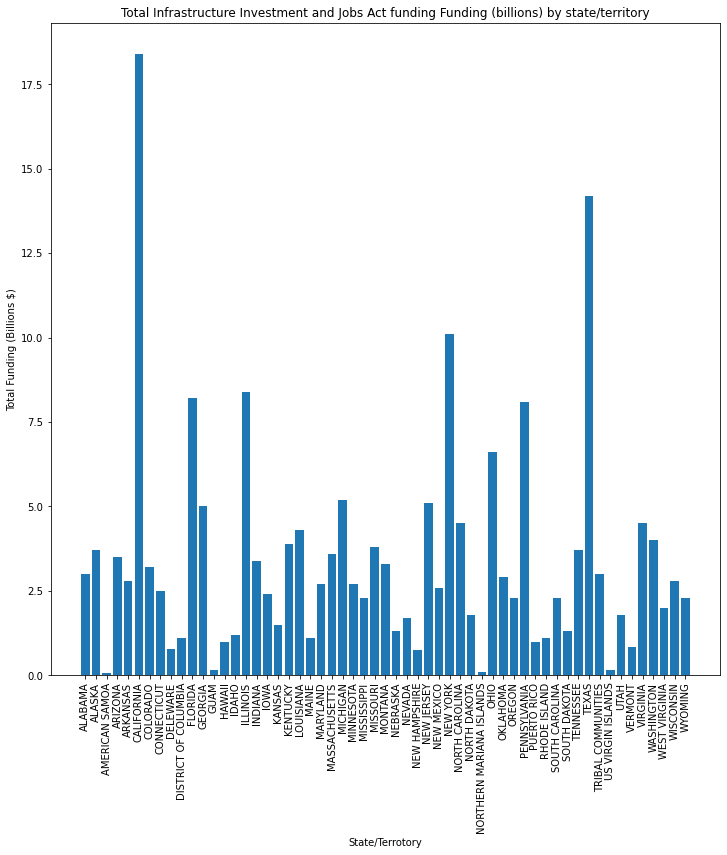

In [59]:
f, ax = plt.subplots(figsize=(12, 12))
ax.bar(df.state, df.total_funding)
ax.set_xticks(df.state.values)
ax.set_xticklabels(df.state.values, rotation=90)

ax.set_title("Total Infrastructure Investment and Jobs Act funding Funding (billions) by state/territory")
ax.set_ylabel("Total Funding (Billions $)")
ax.set_xlabel("State/Terrotory")


In [60]:
# Read in GeoJSON containing state boundary data
geojson_path = "https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/one-page-bio-andrewbowen19/main/data/us-states.json?token=GHSAT0AAAAAACGJXILVD5CBZSUI7CBDEGR6ZH4QL4A"
with open(geojson_path, "r") as f:
    states = json.load(f)

# Making our state
df['state'] = df.state.apply(str.title).apply(str.strip).astype(str)
df.head()

,state,total_funding
0,Alabama,3.0000
1,Alaska,3.7000
2,American Samoa,0.0686
3,Arizona,3.5000
4,Arkansas,2.8000


Let's make a choropleth plot first of the **total** funding for each state. We'll be using the [python `plotly` library](https://plotly.com/python/choropleth-maps/) to accomplish this.

In [62]:
# Plot a choropleth using plotly
fig = px.choropleth(df, geojson=states, locations='state', color='total_funding',
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    scope="usa", featureidkey='properties.name',
                    labels={'state':'total_funding'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


## Adding in our Population Data
We should include the population of each state, as that will give us a better sense of funding per capita. I found [state population totals from the US Census Bureau here](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html) and can join this onto our original dataframe

In [63]:
population = pd.read_excel("./data/NST-EST2022-POP.xlsx",
                           header=3)
# Rename columns and update state values for joining
population.columns = ["state",
                      "base_population",
                      "population_estimate_2020",
                      "population_estimate_2021",
                      "population_estimate_2022"]
population["state"] = population["state"].astype(str).apply(str.title).apply(str.strip)
population["state"] = population["state"].str.replace(".", "").astype(str)

population.head(10)

/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_6668/1342410111.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,state,base_population,population_estimate_2020,population_estimate_2021,population_estimate_2022
0,United States,331449520.0,331511512.0,332031554.0,333287557.0
1,Northeast,57609156.0,57448898.0,57259257.0,57040406.0
2,Midwest,68985537.0,68961043.0,68836505.0,68787595.0
3,South,126266262.0,126450613.0,127346029.0,128716192.0
4,West,78588565.0,78650958.0,78589763.0,78743364.0
5,Alabama,5024356.0,5031362.0,5049846.0,5074296.0
6,Alaska,733378.0,732923.0,734182.0,733583.0
7,Arizona,7151507.0,7179943.0,7264877.0,7359197.0
8,Arkansas,3011555.0,3014195.0,3028122.0,3045637.0
9,California,39538245.0,39501653.0,39142991.0,39029342.0


In [64]:
# Joinign population data to our funding data
df = df.merge(population, how="left", left_on="state", right_on="state")

df.head()

,state,total_funding,base_population,population_estimate_2020,population_estimate_2021,population_estimate_2022
0,Alabama,3.0000,5024356.0,5031362.0,5049846.0,5074296.0
1,Alaska,3.7000,733378.0,732923.0,734182.0,733583.0
2,American Samoa,0.0686,NaN,NaN,NaN,NaN
3,Arizona,3.5000,7151507.0,7179943.0,7264877.0,7359197.0
4,Arkansas,2.8000,3011555.0,3014195.0,3028122.0,3045637.0
5,California,18.4000,39538245.0,39501653.0,39142991.0,39029342.0
6,Colorado,3.2000,5773733.0,5784865.0,5811297.0,5839926.0
7,Connecticut,2.5000,3605942.0,3597362.0,3623355.0,3626205.0
8,Deleware,0.7920,NaN,NaN,NaN,NaN
9,District Of Columbia,1.1000,689546.0,670868.0,668791.0,671803.0


In [74]:
df['funding_per_capita'] = df['total_funding'] * 1_000_000_000 / df['base_population']
# plt.hist(df.funding_per_capita)
df.head()

,state,total_funding,base_population,population_estimate_2020,population_estimate_2021,population_estimate_2022,funding_per_capita
0,Alabama,3.0000,5024356.0,5031362.0,5049846.0,5074296.0,597.091448
1,Alaska,3.7000,733378.0,732923.0,734182.0,733583.0,5045.147250
2,American Samoa,0.0686,NaN,NaN,NaN,NaN,NaN
3,Arizona,3.5000,7151507.0,7179943.0,7264877.0,7359197.0,489.407338
4,Arkansas,2.8000,3011555.0,3014195.0,3028122.0,3045637.0,929.752238


In [78]:
# Plot a choropleth using plotly
fig = px.choropleth(df, geojson=states, locations='state', color='funding_per_capita',
                    color_continuous_scale="Viridis",
                    scope="usa", featureidkey='properties.name',
                    labels={'State':'Funding Per Capita'},
                    title="IRA Fundsing per Capita ($)")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## TODO
- Add population data
    - It doesn't make sense to compare raw totals, as population influences the total funding a state receives